# EDA v2 - Modularizado con funciones

In [1]:
import pandas as pd
from src.utils.utils import get_base_dir
from src.data_exploration.eda_functions import (
    load_and_clean_data, show_basic_info, analyze_duplicates, plot_grouped_data,
    analyze_top_products, analyze_top_customers, describe_column_uniques, plot_histogram, plot_top_customers_over_time, plot_top_products_over_time
)

## Cargar y limpiar datos

In [2]:
base_dir = get_base_dir()
sell_in, tb_productos, tb_stocks = load_and_clean_data(base_dir)

In [3]:
sell_in[sell_in["product_id"] == 20808]

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
76331,201701,10007,20808,0,1,0.00197,0.00197
76332,201701,10135,20808,0,1,0.00197,0.00197
76333,201701,10171,20808,0,1,0.01179,0.01179
76334,201701,10252,20808,0,1,0.06683,0.06683
76335,201701,10040,20808,0,4,0.62310,0.62310
...,...,...,...,...,...,...,...
2181476,201902,10066,20808,0,1,0.02293,0.02293
2422882,201905,10071,20808,0,1,0.00573,0.00573
2504350,201906,10071,20808,0,1,0.00573,0.00573
2586167,201907,10040,20808,0,1,0.19492,0.19492


In [4]:
tb_productos[tb_productos["product_id"] == 20808]

,cat1,cat2,cat3,brand,sku_size,product_id,descripcion


## Información básica y primeros registros

In [5]:
show_basic_info({'sell_in': sell_in, 'tb_productos': tb_productos, 'tb_stocks': tb_stocks})

Datos sell_in: (2945818, 7)


'sell_in'

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.05300,0.05300
1,201701,10032,20524,0,1,0.13628,0.13628
2,201701,10217,20524,0,1,0.03028,0.03028
3,201701,10125,20524,0,1,0.02271,0.02271
4,201701,10012,20524,0,11,1.54452,1.54452


Datos tb_productos: (1251, 7)


'tb_productos'

,cat1,cat2,cat3,brand,sku_size,product_id,descripcion
0,FOODS,ADEREZOS,Aji Picante,NATURA,240,20609,Salsa Aji Picante
1,FOODS,ADEREZOS,Barbacoa,NATURA,250,20266,Salsa Barbacoa
2,FOODS,ADEREZOS,Barbacoa,NATURA,400,20325,Salsa Barbacoa
3,FOODS,ADEREZOS,Barbacoa,NATURA,500,20503,Salsa Barbacoa
4,FOODS,ADEREZOS,Chimichurri,NATURA,350,20797,Chimichurri


Datos tb_stocks: (13691, 3)


'tb_stocks'

,periodo,product_id,stock_final
0,201810,20524,1.61267
1,201810,20311,2.93657
2,201810,20654,6.83269
3,201810,21005,1.01338
4,201810,20974,0.34595


## Duplicados

In [6]:
print('Sell_in duplicados:')
analyze_duplicates(sell_in)
print('tb_productos duplicados:')
analyze_duplicates(tb_productos)
print('tb_stocks duplicados:')
analyze_duplicates(tb_stocks)

Sell_in duplicados:
(2945818, 7)
tb_productos duplicados:
(1251, 7)
tb_stocks duplicados:
(13691, 3)


## Unicidad de registros clave en sell_in

In [7]:
print('Unicidad periodo-customer_id-product_id en sell_in:')
analyze_duplicates(sell_in, ['periodo','customer_id','product_id'])

Unicidad periodo-customer_id-product_id en sell_in:
(2945818, 3)


## Describir columnas categóricas de tb_productos

In [8]:
describe_column_uniques(tb_productos)

Columna 'cat1' tiene 4 valores únicos.
cat1
PC       0.576339
HC       0.233413
FOODS    0.179856
REF      0.010392
Name: proportion, dtype: float64


Columna 'cat2' tiene 15 valores únicos.
cat2
CABELLO                0.281375
DEOS                   0.134293
SOPAS Y CALDOS         0.106315
PIEL2                  0.091127
ROPA LAVADO            0.079137
HOGAR                  0.061551
PIEL1                  0.058353
ADEREZOS               0.055156
VAJILLA                0.037570
PROFESIONAL            0.027178
ROPA ACONDICIONADOR    0.026379
OTROS                  0.018385
DENTAL                 0.011191
TE                     0.010392
ROPA MANCHAS           0.001599
Name: proportion, dtype: float64


Columna 'cat3' tiene 99 valores únicos.
cat3
SHAMPOO           0.115108
ACONDICIONADOR    0.094325
Aero              0.091127
Liquido           0.050360
Polvo             0.038369
                    ...   
Pies Aero         0.000799
Pies NoAero       0.000799
Alcohol           0.000799
D

## Agregaciones y gráficos por periodo en tb_stocks

C:\Users\lauta\Desktop\Lautaro\maestria_ds\labo3\repo-entrega\src\data_exploration\eda_functions.py:67: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns=[group_col])


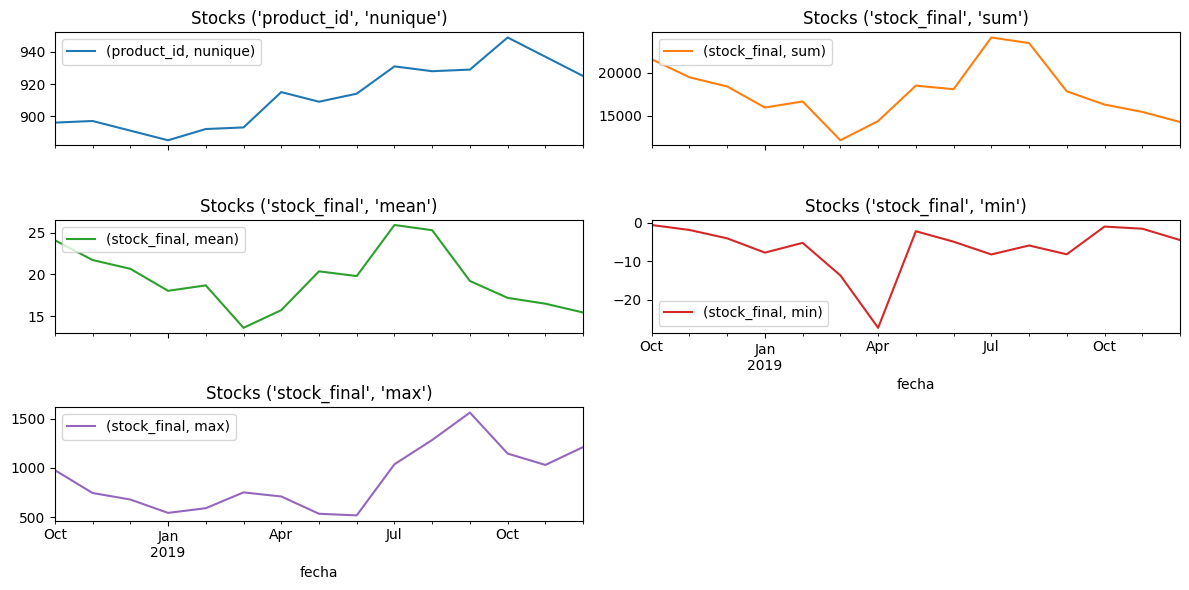

In [9]:
agg_dict = {
    'product_id': 'nunique',
    'stock_final': ['sum', 'mean', 'min', 'max']
}
plot_grouped_data(tb_stocks, agg_dict, title_prefix='Stocks')

## Agregaciones y gráficos por periodo en sell_in

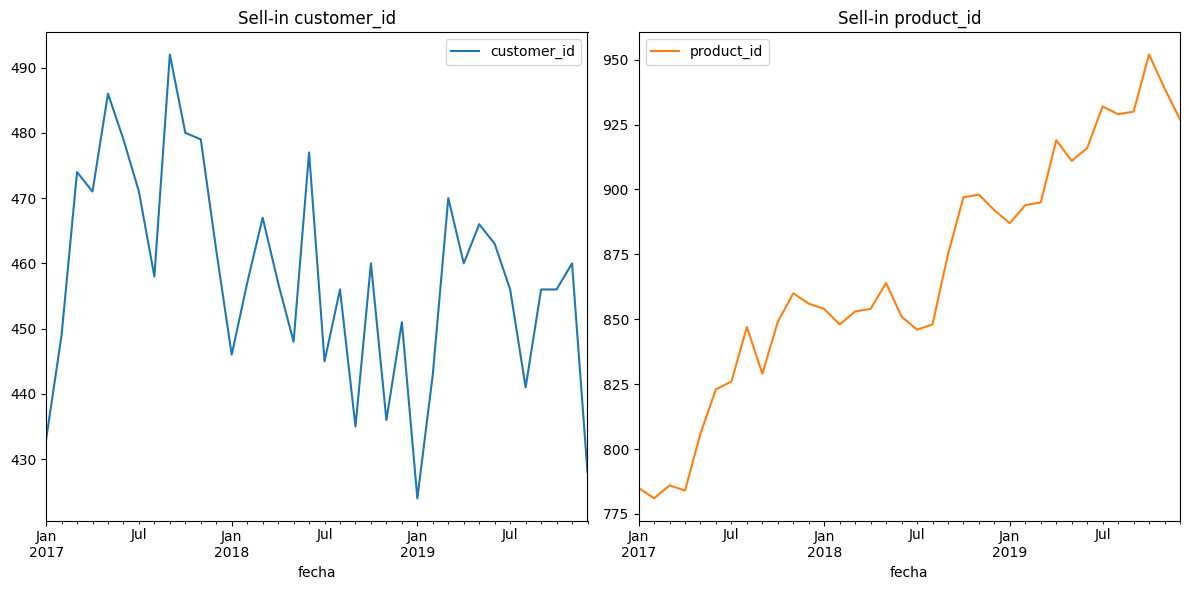

In [10]:
agg_dict = {
    'customer_id': 'nunique',
    'product_id': 'nunique',
}
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in')

C:\Users\lauta\Desktop\Lautaro\maestria_ds\labo3\repo-entrega\src\data_exploration\eda_functions.py:67: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns=[group_col])


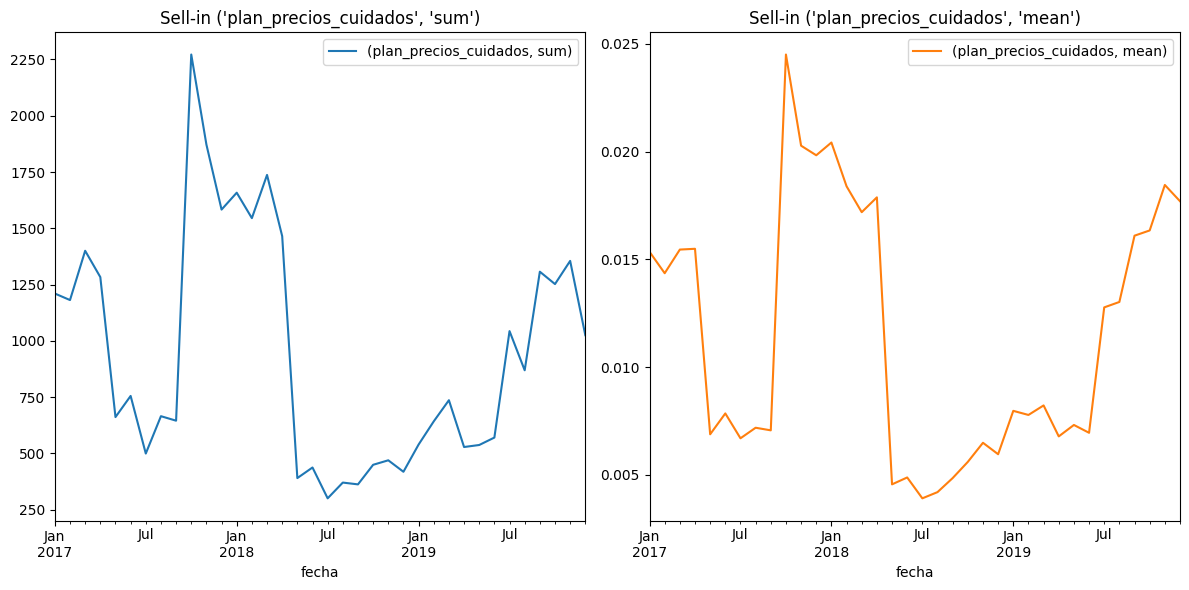

In [11]:
agg_dict = {
    'plan_precios_cuidados': ['sum', 'mean'],
}
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in')

C:\Users\lauta\Desktop\Lautaro\maestria_ds\labo3\repo-entrega\src\data_exploration\eda_functions.py:67: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns=[group_col])


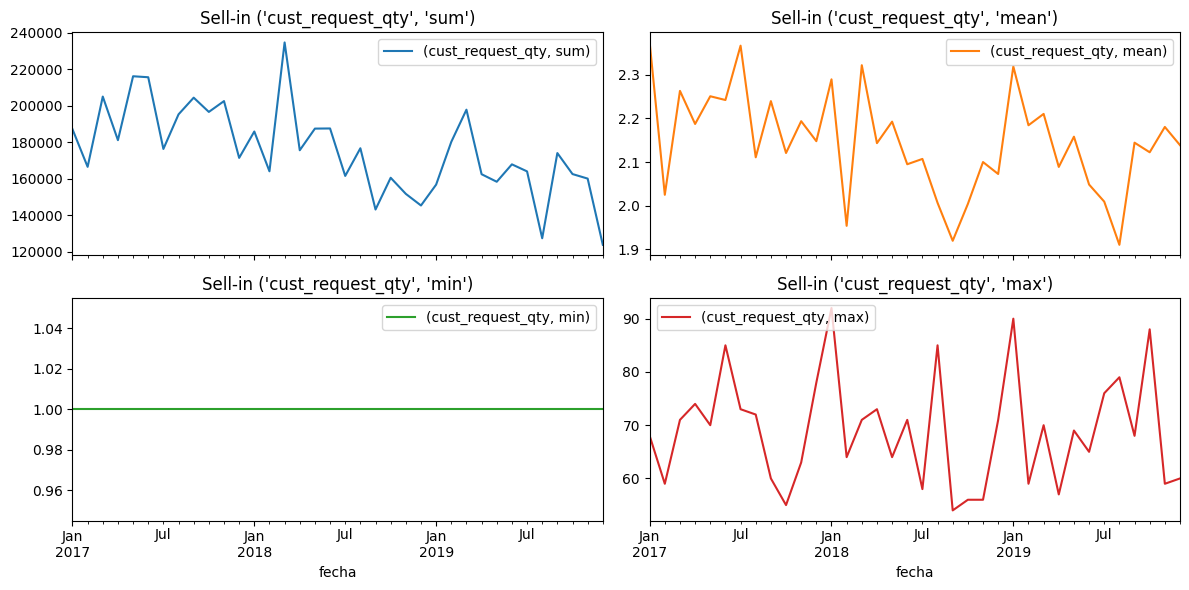

In [12]:
agg_dict = {'cust_request_qty': ['sum', 'mean', 'min', 'max']}
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in')

C:\Users\lauta\Desktop\Lautaro\maestria_ds\labo3\repo-entrega\src\data_exploration\eda_functions.py:67: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns=[group_col])


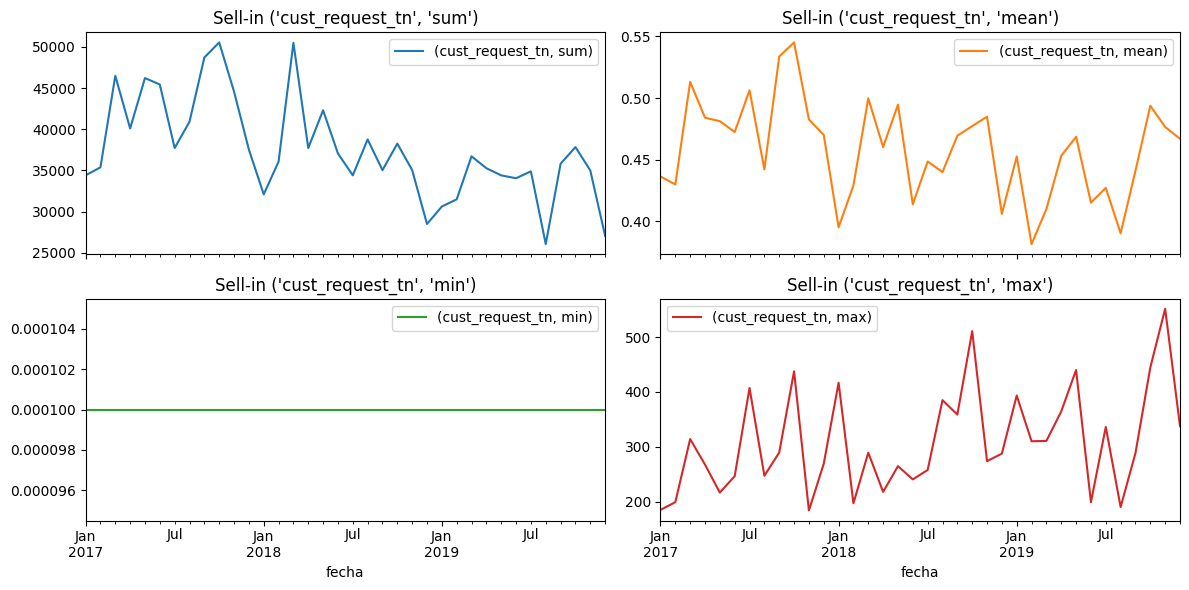

In [13]:
agg_dict = {'cust_request_tn': ['sum', 'mean', 'min', 'max']}
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in')

C:\Users\lauta\Desktop\Lautaro\maestria_ds\labo3\repo-entrega\src\data_exploration\eda_functions.py:67: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns=[group_col])


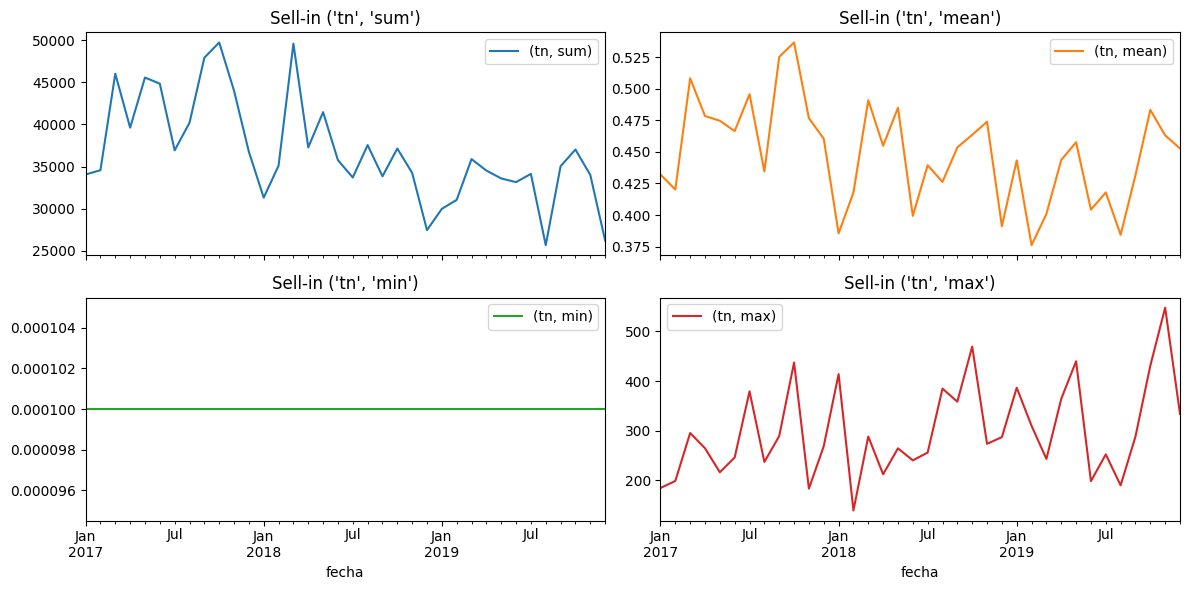

In [14]:
agg_dict = {'tn': ['sum', 'mean', 'min', 'max']}
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in')

## Top productos por tn

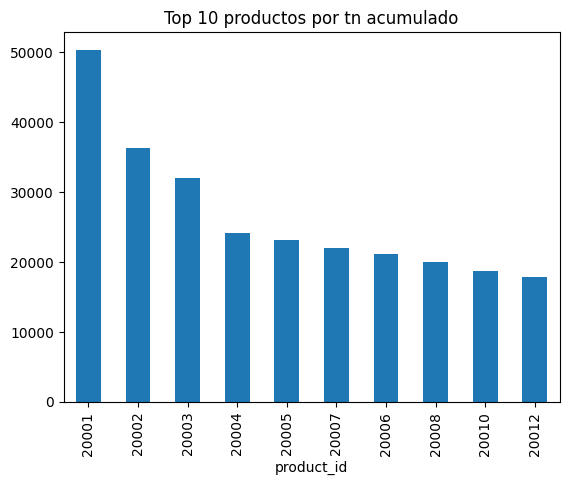

,product_id,tn,tn_cumsum
0,20001,50340.39558,3.799308
1,20002,36337.25439,6.541766
2,20003,32004.15274,8.957194
3,20004,24178.15379,10.781977
4,20005,23191.21852,12.532272
5,20007,22018.45234,14.194057
6,20006,21088.76007,15.785675
7,20008,19948.29352,17.291219
8,20010,18671.07918,18.700369
9,20012,17813.59935,20.044804


In [15]:
data = analyze_top_products(sell_in)
data[:10]

## Top clientes por tn

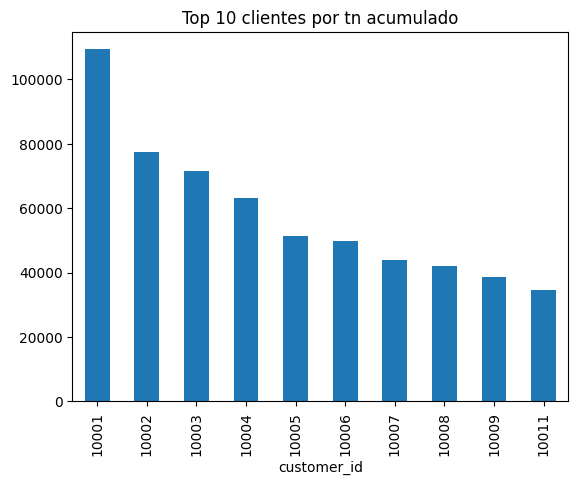

,customer_id,tn,tn_cumsum
0,10001,109203.60059,8.241852
1,10002,77333.16887,14.078368
2,10003,71375.91941,19.465276
3,10004,63065.94269,24.225011
4,10005,51467.04585,28.109350
5,10006,49779.23364,31.866305
6,10007,43740.39629,35.167496
7,10008,41962.99046,38.334541
8,10009,38742.71591,41.258545
9,10011,34675.44337,43.875582


In [16]:
data = analyze_top_customers(sell_in)
data[:10]

## Histograma de tn (filtrado por percentil 90)

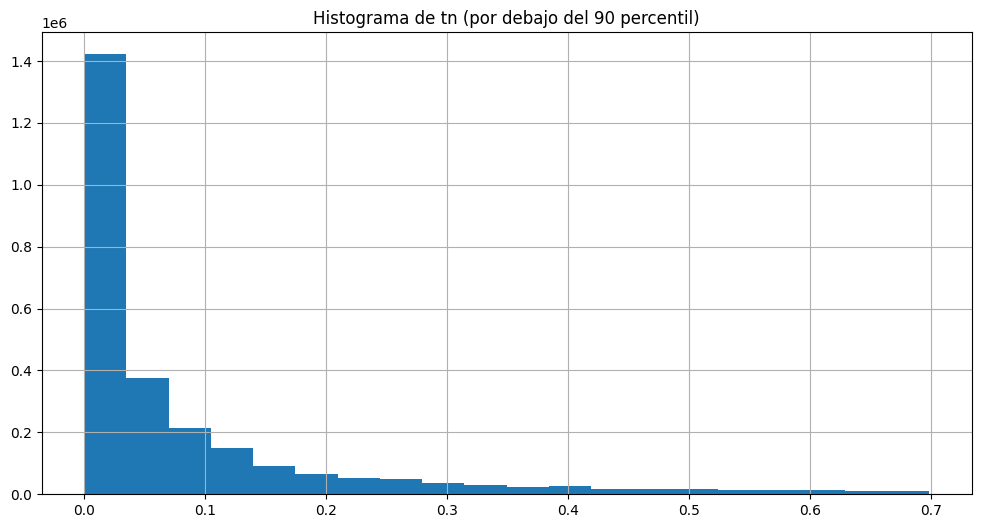

In [17]:
plot_histogram(sell_in, 'tn', quantile=0.9)

## Por Producto

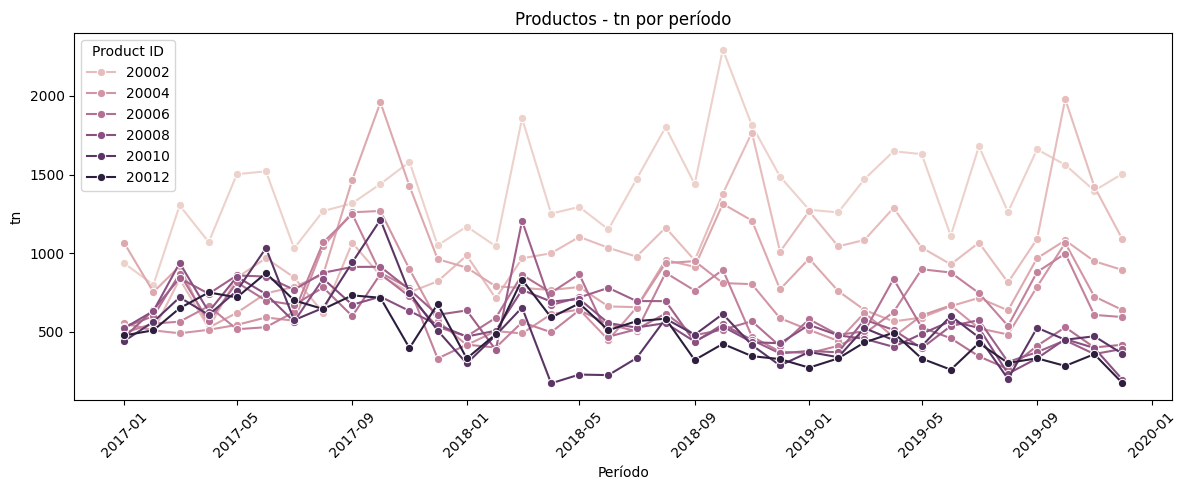

In [18]:
plot_top_products_over_time(sell_in)

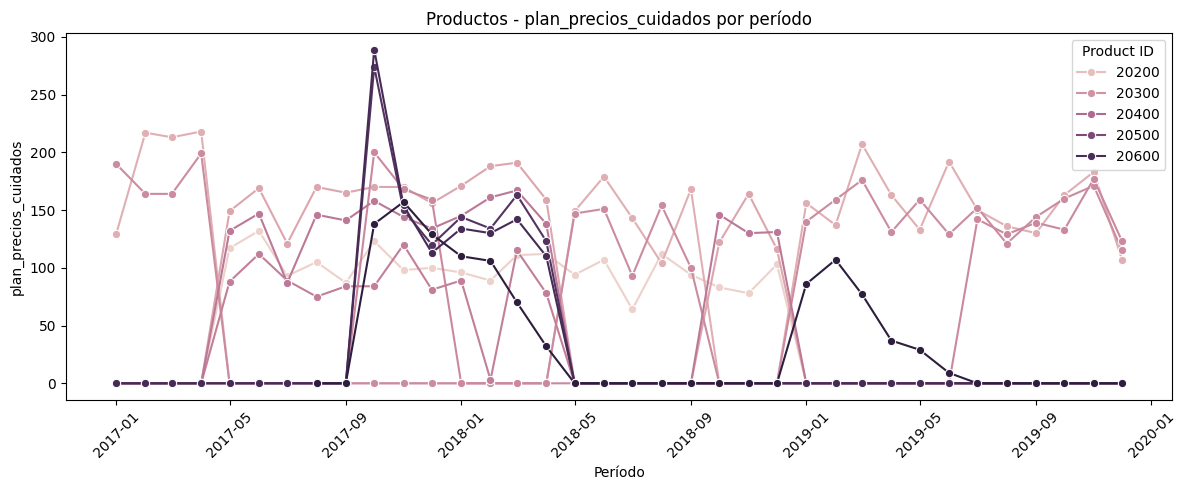

In [19]:
plot_top_products_over_time(sell_in, "plan_precios_cuidados")

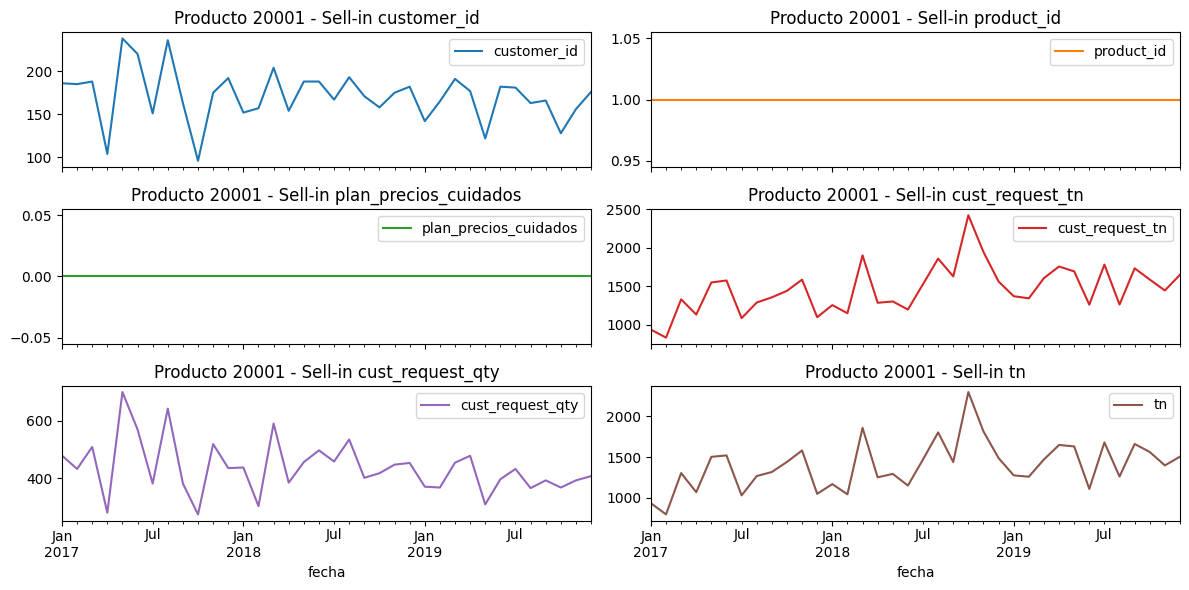

In [20]:
agg_dict = {
    'customer_id': 'nunique',
    'product_id': 'nunique',
    'plan_precios_cuidados': 'mean',
    'cust_request_tn': 'sum',
    'cust_request_qty': 'sum',
    'tn': 'sum'
}
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in', by_product_id=20001)

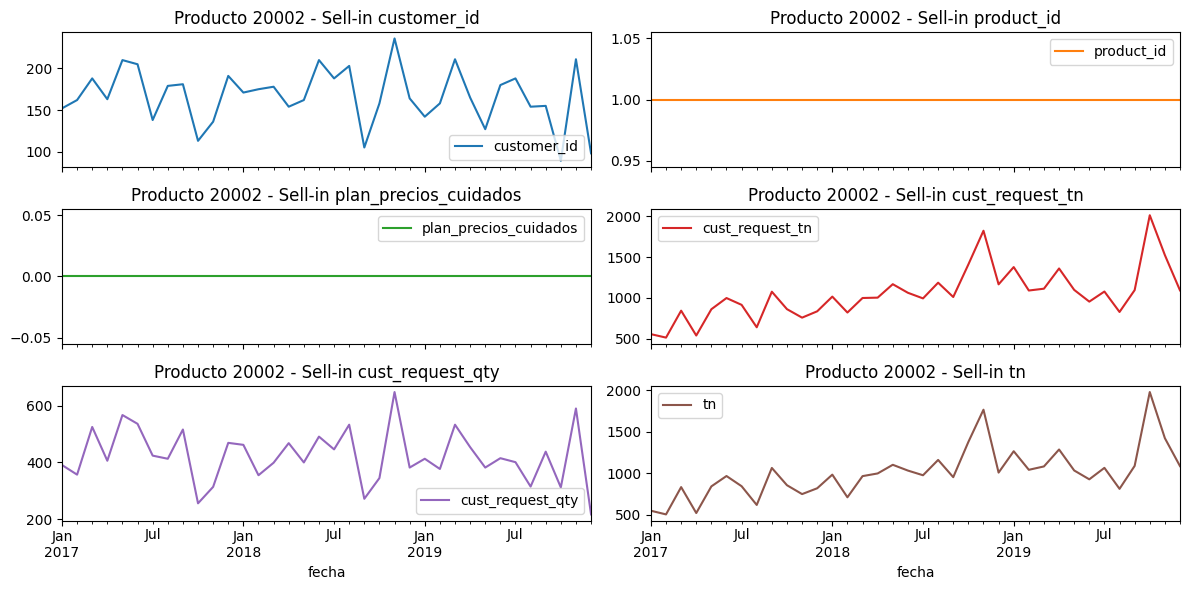

In [21]:
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in', by_product_id=20002)

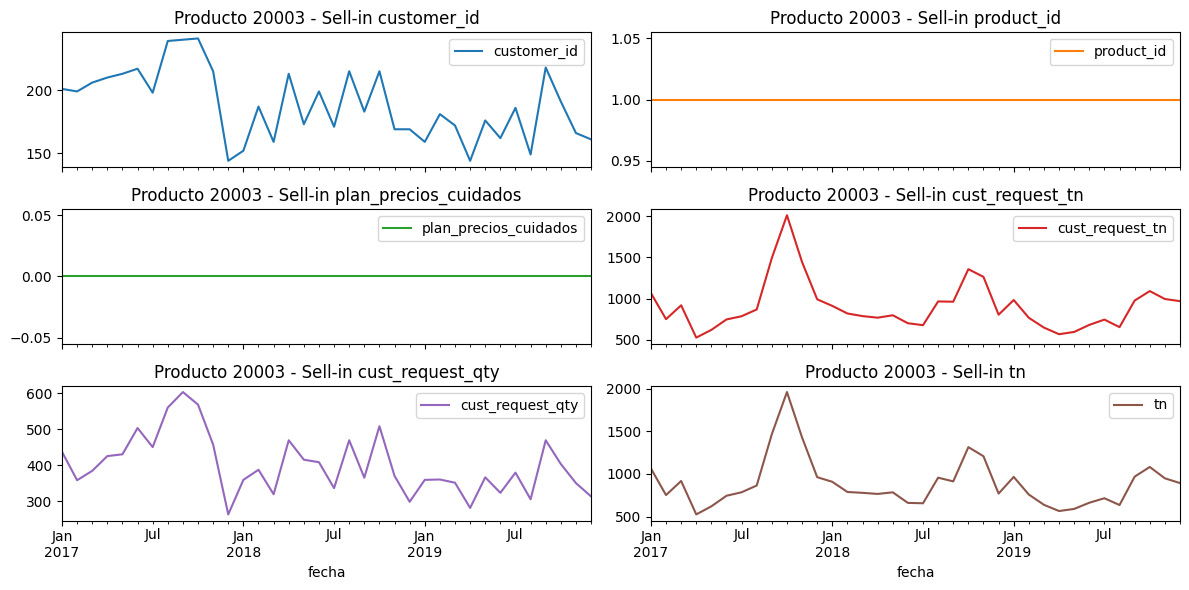

In [22]:
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in', by_product_id=20003)

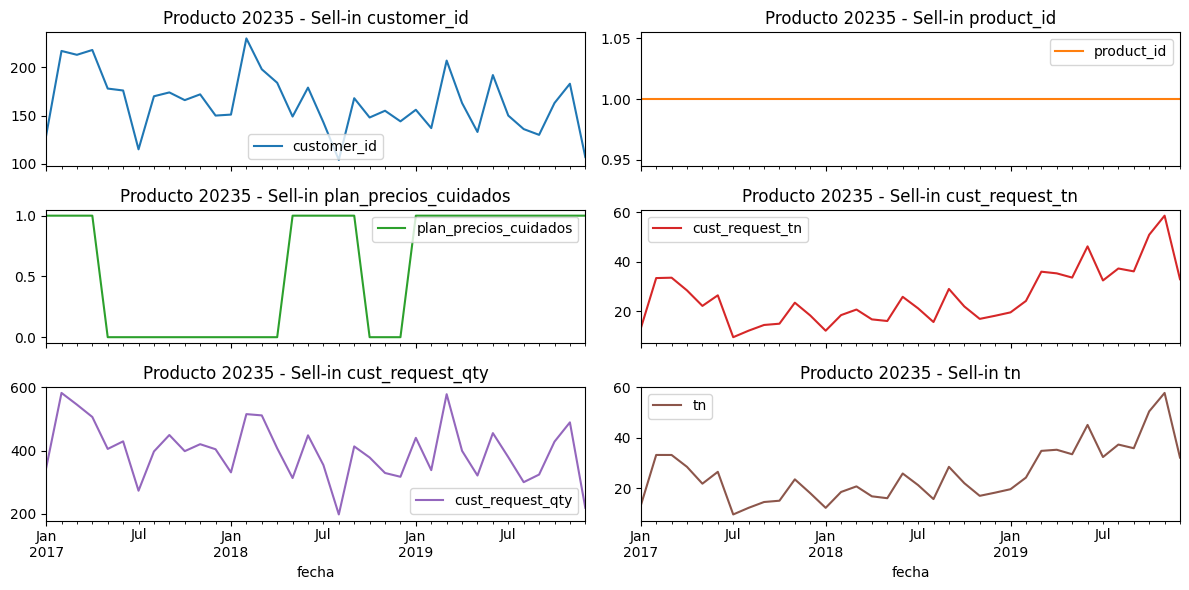

In [23]:
plot_grouped_data(sell_in, agg_dict, title_prefix='Sell-in', by_product_id=20235)

## Por Cliente

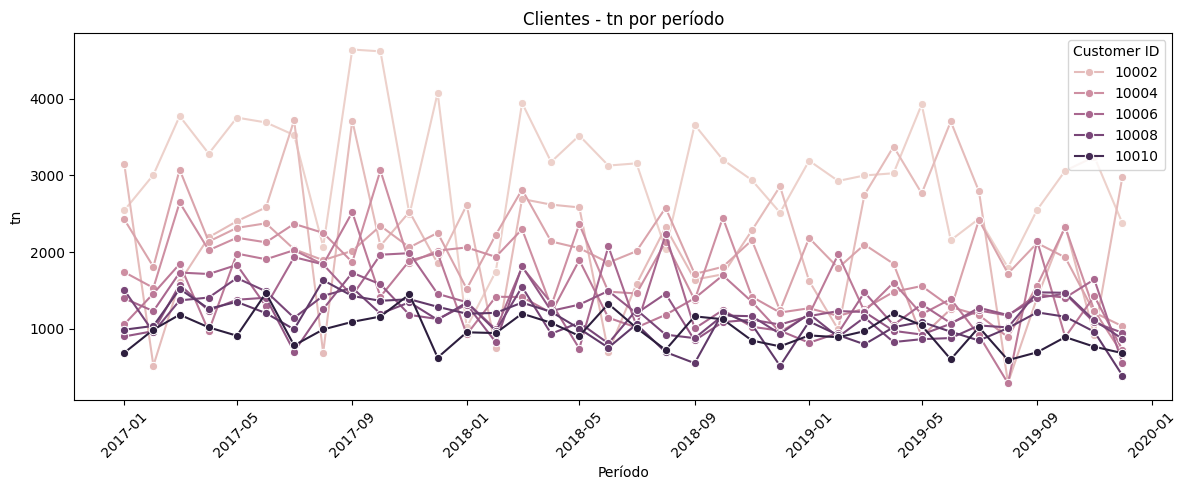

In [24]:
plot_top_customers_over_time(sell_in)